# Part 1: MLP

11812804 董正

## Task 1: MLP Implementation

See [pytorch_mlp.py](pytorch_mlp.py) and [pytorch_train_mlp.py](pytorch_train_mlp.py).

In [13]:
%run pytorch_train_mlp.py -h

usage: pytorch_train_mlp.py [-h] [--dnn_hidden_units DNN_HIDDEN_UNITS]
                            [--learning_rate LEARNING_RATE]
                            [--max_epochs MAX_EPOCHS] [--eval_freq EVAL_FREQ]
                            [--batch_size BATCH_SIZE] [--dataset DATASET]
                            [--save_fig] [--visual_model] [--quiet] [--gpu]

optional arguments:
  -h, --help            show this help message and exit
  --dnn_hidden_units DNN_HIDDEN_UNITS, -u DNN_HIDDEN_UNITS
                        Comma separated list of number of units in each hidden
                        layer.
  --learning_rate LEARNING_RATE, -l LEARNING_RATE
                        Learning rate.
  --max_epochs MAX_EPOCHS, -e MAX_EPOCHS
                        Number of epochs to run trainer.
  --eval_freq EVAL_FREQ, -f EVAL_FREQ
                        Frequency of evaluation on the test set.
  --batch_size BATCH_SIZE, -b BATCH_SIZE
                        Batch size: 1 -- SGD, -1 -- BGD, others 

---Using CUDA---
MLP(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=2, bias=True)
    (3): Softmax(dim=1)
  )
)
Using test set as evaluation.
Train set shape torch.Size([1400, 2])
Num of batches = 175
2022-04-16 13:26:24.506961 Epoch 10 	Train Loss = 0.43585 Train acc = 0.884  Eval Loss = 0.44379 Eval acc = 0.872 
2022-04-16 13:26:26.372143 Epoch 20 	Train Loss = 0.41944 Train acc = 0.897  Eval Loss = 0.42767 Eval acc = 0.882 
2022-04-16 13:26:28.299712 Epoch 30 	Train Loss = 0.41316 Train acc = 0.901  Eval Loss = 0.42151 Eval acc = 0.893 
2022-04-16 13:26:30.346938 Epoch 40 	Train Loss = 0.40957 Train acc = 0.905  Eval Loss = 0.41797 Eval acc = 0.895 
2022-04-16 13:26:32.515868 Epoch 50 	Train Loss = 0.40677 Train acc = 0.908  Eval Loss = 0.41518 Eval acc = 0.897 
2022-04-16 13:26:34.914575 Epoch 60 	Train Loss = 0.40430 Train acc = 0.908  Eval Loss = 0.41264 Eval acc = 0.905 
2022-04-16 

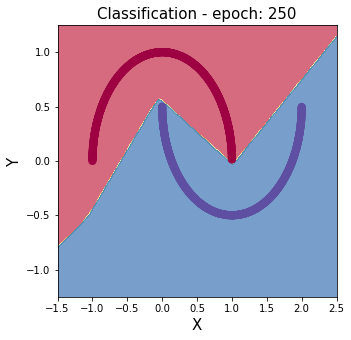

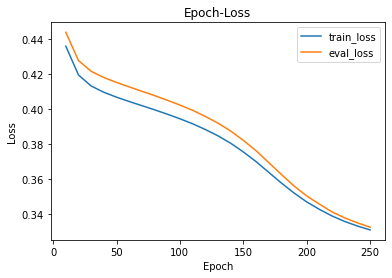

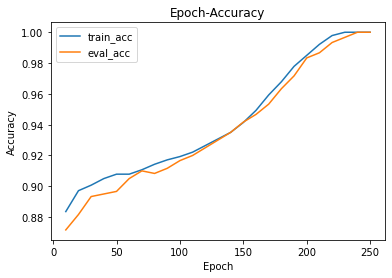

In [8]:
%run pytorch_train_mlp.py -u 20 -l 0.01 -e 250 -b 8 -f 10 -v --gpu

## Task 2: Compare NumPy and PyTorch version

### 2.1 Moon dataset

---Using CPU---
MLP(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=2, bias=True)
    (3): Softmax(dim=1)
  )
)
Using test set as evaluation.
Train set shape torch.Size([1400, 2])
Num of batches = 175


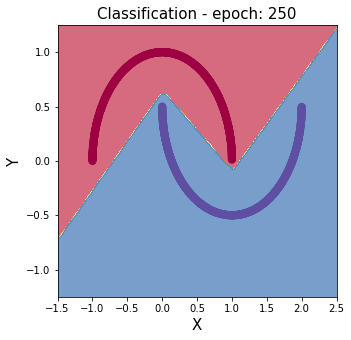

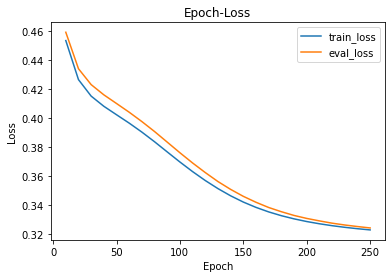

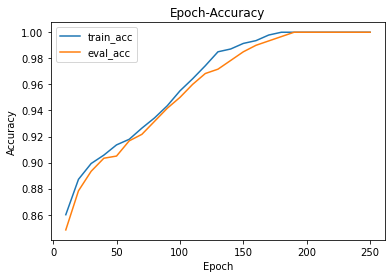

Wall time: 22.9 s


In [9]:
%%time

%run pytorch_train_mlp.py -u 20 -l 0.01 -e 250 -b 8 -f 10 -v -q

MLP Structure:
Linear -> ReLU -> Linear -> SoftMax -> out

Using test set as evaluation.
Train set shape (1400, 2)
Num of batches = 175


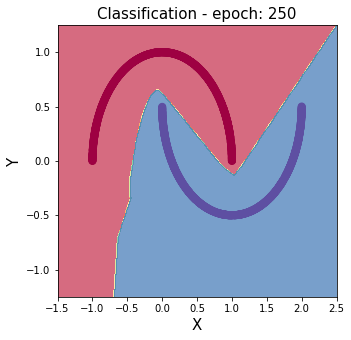

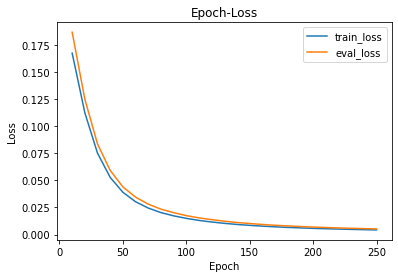

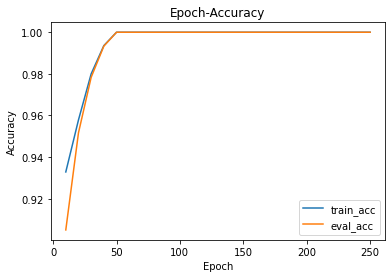

Wall time: 13.6 s


In [10]:
%%time

%run mlp_np/train_mlp_numpy.py -u 20 -l 0.01 -e 250 -b 8 -f 10 -v -q

We can see that both version achieves 100% accuracy, but the `NumPy` version trains and converges faster.

I think this is because the dataset is too simple.

### 2.2 Circle dataset

---Using CPU---
MLP(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=2, bias=True)
    (3): Softmax(dim=1)
  )
)
Using test set as evaluation.
Train set shape torch.Size([1400, 2])
Num of batches = 175


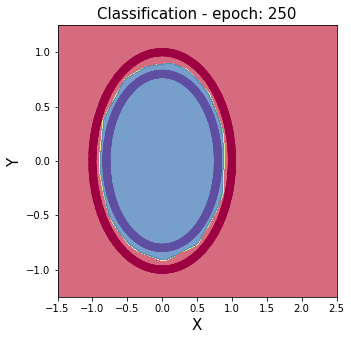

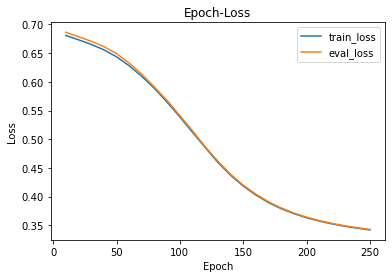

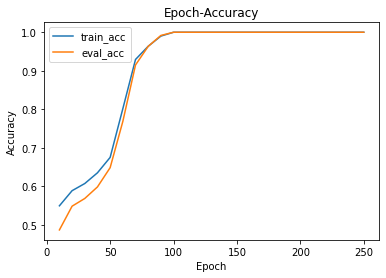

Wall time: 26.8 s


In [28]:
%%time

%run pytorch_train_mlp.py -u 20 -l 0.01 -e 250 -b 8 -f 10 -v -q -d circle

MLP Structure:
Linear -> ReLU -> Linear -> SoftMax -> out

Using test set as evaluation.
Train set shape (1400, 2)
Num of batches = 175


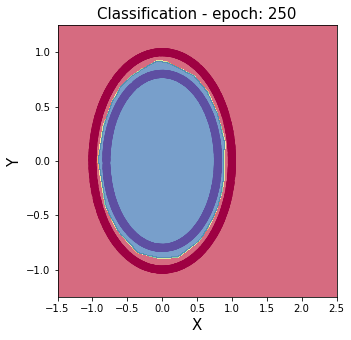

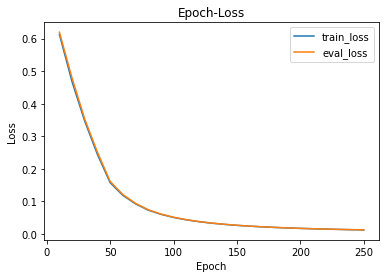

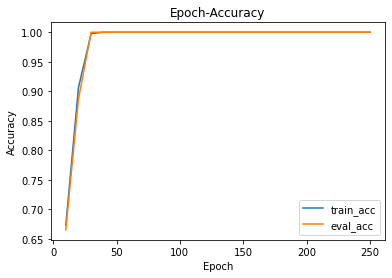

Wall time: 13.4 s


In [12]:
%%time

%run mlp_np/train_mlp_numpy.py -u 20 -l 0.01 -e 250 -b 8 -f 10 -v -q -d circle

## Task 3: CIFAR10

In [37]:
import torchvision
import torch

batch_size = 128
num_workers = 0

transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(0.5, 0.5)
])

trainset = torchvision.datasets.CIFAR10(root='../data',
                                        train=True,
                                        download=True,
                                        transform=transform)
testset = torchvision.datasets.CIFAR10(root='../data',
                                       train=False,
                                       download=True,
                                       transform=transform)

x_train = torch.FloatTensor(trainset.data.reshape(-1, 32*32*3))
y_train = torch.LongTensor(trainset.targets)
x_test = torch.FloatTensor(testset.data.reshape(-1, 32*32*3))
y_test = torch.LongTensor(testset.targets)

trainset = torch.utils.data.TensorDataset(x_train, y_train)
testset = torch.utils.data.TensorDataset(x_test, y_test)

trainset_loader = torch.utils.data.DataLoader(trainset,
                                              batch_size=batch_size,
                                              shuffle=True,
                                              num_workers=num_workers,
                                              pin_memory=True)
testset_loader = torch.utils.data.DataLoader(testset,
                                             batch_size=batch_size,
                                             shuffle=True,
                                             num_workers=num_workers,
                                             pin_memory=True)

Files already downloaded and verified
Files already downloaded and verified


In [38]:
def onehot_decode(label):
    return torch.argmax(label, dim=1)

def accuracy(predictions, targets):
    pred_decode = onehot_decode(predictions)
    true_decode = targets

    assert (len(pred_decode) == len(true_decode))

    acc = torch.mean((pred_decode == true_decode).float())

    return float(acc)

@torch.no_grad()
def eval_model(model, criterion, x, y):
    out = model.forward(x)
    loss = criterion.forward(out, y)
    acc = accuracy(out, y)

    return float(loss), float(acc)

MLP(
  (layers): Sequential(
    (0): Linear(in_features=3072, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=10, bias=True)
    (5): Softmax(dim=1)
  )
)
2022-04-16 19:30:59.229023 Epoch 10 	Train Loss = 2.36109 Train acc = 0.100  Eval Loss = 2.36157 Eval acc = 0.100 
2022-04-16 19:31:23.006536 Epoch 20 	Train Loss = 2.36117 Train acc = 0.100  Eval Loss = 2.36226 Eval acc = 0.099 
2022-04-16 19:31:46.744295 Epoch 30 	Train Loss = 2.36114 Train acc = 0.100  Eval Loss = 2.36087 Eval acc = 0.100 
2022-04-16 19:32:10.937323 Epoch 40 	Train Loss = 2.36115 Train acc = 0.100  Eval Loss = 2.36157 Eval acc = 0.100 
2022-04-16 19:32:35.342306 Epoch 50 	Train Loss = 2.36116 Train acc = 0.100  Eval Loss = 2.36087 Eval acc = 0.100 
2022-04-16 19:32:59.558002 Epoch 60 	Train Loss = 2.36115 Train acc = 0.100  Eval Loss = 2.36018 Eval acc = 0.101 
2022-04-16 19:33:24.328838 Epoch 

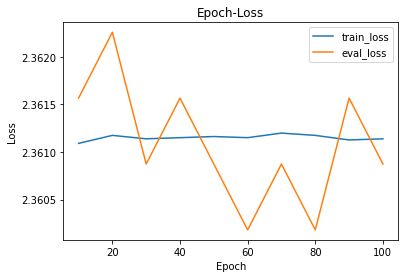

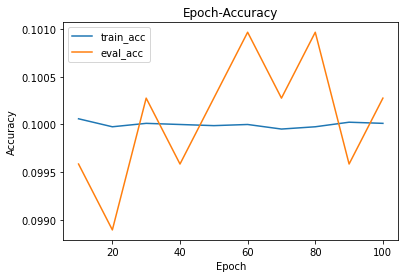

In [61]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
from pytorch_mlp import MLP

max_epochs = 100
learning_rate = 0.01
verbose = 10
units = [512, 256]
gpu = True

mlp = MLP(32*32*3, units, 10)
if gpu and torch.cuda.is_available():
    mlp.cuda()
print(mlp)

optimizer = torch.optim.Adam(mlp.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

train_loss_list = []
train_acc_list = []
eval_loss_list = []
eval_acc_list = []
for epoch in range(max_epochs):
    batch_loss_list = []
    batch_acc_list = []
    for x_batch, y_batch in trainset_loader:
        if gpu and torch.cuda.is_available():
            x_batch = x_batch.cuda()
            y_batch = y_batch.cuda()

        out_batch = mlp.forward(x_batch)
        batch_acc_list.append(accuracy(out_batch, y_batch))

        loss = criterion.forward(out_batch, y_batch)
        batch_loss_list.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % verbose == 0:
        # train loss
        train_loss = sum(batch_loss_list) / len(batch_loss_list)
        train_acc = sum(batch_acc_list) / len(batch_acc_list)

        # eval loss and acc
        eval_loss, eval_acc = 0, 0
        count = 0
        for eval_x_batch, eval_y_batch in testset_loader:
            if gpu and torch.cuda.is_available():
                eval_x_batch = eval_x_batch.cuda()
                eval_y_batch = eval_y_batch.cuda()
            eval_loss_batch, eval_acc_batch = eval_model(
                mlp, criterion, eval_x_batch, eval_y_batch)

            eval_loss += eval_loss_batch
            eval_acc += eval_acc_batch
            count += 1
        eval_loss /= count
        eval_acc /= count

        print(datetime.datetime.now(), "Epoch", epoch + 1,
                "\tTrain Loss = %.5f" % train_loss,
                "Train acc = %.3f " % train_acc,
                "Eval Loss = %.5f" % eval_loss,
                "Eval acc = %.3f " % eval_acc)

        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)
        eval_loss_list.append(eval_loss)
        eval_acc_list.append(eval_acc)

plt.plot(np.arange(verbose, epoch + 2, step=verbose),
            train_loss_list,
            "-",
            label="train_loss")
plt.plot(np.arange(verbose, epoch + 2, step=verbose),
            eval_loss_list,
            "-",
            label="eval_loss")
plt.title("Epoch-Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(np.arange(verbose, epoch + 2, step=verbose),
            train_acc_list,
            "-",
            label="train_acc")
plt.plot(np.arange(verbose, epoch + 2, step=verbose),
            eval_acc_list,
            "-",
            label="eval_acc")
plt.title("Epoch-Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Conclusion: MLP cannot handle CIFAR10 dataset.